In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import cv2


In [7]:
def load_images(directory):
    images = []
    for filename in os.listdir(directory):

          img = Image.open(os.path.join(directory, filename))
          img = img.resize((224, 224))
          img = img.convert('RGB')
          img = np.array(img) / 255.0
          images.append(img)
    return images


In [8]:
tumor_images = load_images('/content/drive/MyDrive/brain_mri/data/yes')
no_tumor_images = load_images('/content/drive/MyDrive/brain_mri/data/no')

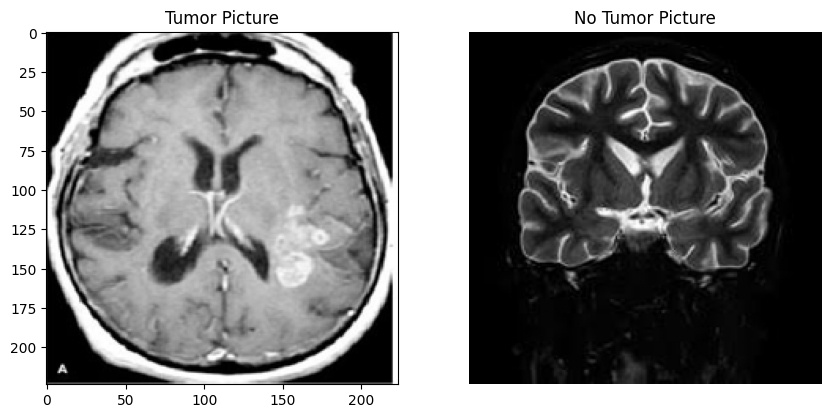

In [9]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(tumor_images[0])
axes[1].imshow(no_tumor_images[0])
axes[0].set_title('Tumor Picture')
axes[1].set_title('No Tumor Picture')
plt.axis('off')
plt.show()


In [10]:
type(tumor_images)

list

In [11]:
len(tumor_images)

155

In [12]:
len(no_tumor_images)

98

In [13]:
def assign_labels(tumor_images, no_tumor_images):
    tumor_labels = np.ones(len(tumor_images))
    no_tumor_labels = np.zeros(len(no_tumor_images))
    return tumor_labels, no_tumor_labels
tumor_labels, no_tumor_labels = assign_labels(tumor_images, no_tumor_images)

In [14]:
tumor_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [15]:
type(tumor_labels)

numpy.ndarray

In [16]:
data = tumor_images + no_tumor_images
labels = np.concatenate((tumor_labels, no_tumor_labels), axis=0)

In [17]:
len(data)

253

In [18]:
type(data)

list

In [19]:
type(data[0])

numpy.ndarray

In [20]:
data[0].shape

(224, 224, 3)

In [21]:
len(labels)

253

In [22]:
type(labels)

numpy.ndarray

In [23]:
labels.shape

(253,)

In [24]:
X = np.array(data)
y = np.array(labels)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 38)

In [26]:
X_train.shape

(202, 224, 224, 3)

In [27]:
X_train

array([[[[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        ...,

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]

In [28]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [29]:
validation_size = int(0.1 * 202)
train = train.skip(validation_size)
val = train.take(validation_size)

In [30]:
BATCH_SIZE = 32
train = train.batch(BATCH_SIZE)
test = test.batch(BATCH_SIZE)
val = val.batch(BATCH_SIZE)

In [31]:
train.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.01568627, 0.01568627, 0.01568627],
          [0.01568627, 0.01568627, 0.01568627],
          [0.01176471, 0.01176471, 0.01176471]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.01176471, 0.01176471, 0.01176471],
          [0.01568627, 0.01568627, 0.01568627],
          [0.01568627, 0.01568627, 0.01568627]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.01176471, 0.01176471, 0.01176471],
          [0.01568627, 0.01568627, 0.01568627],
          [0.01568627, 0.01568627, 0.01568627]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [32]:
model = Sequential()

In [33]:
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (224,224,3), padding='valid'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 256)               100933888 
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                        

In [35]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
history = model.fit(train, validation_data = val, epochs = 20, verbose = 1)

Epoch 1/20
6/6 [==============================] - 26s 4s/step - loss: 7.6932 - accuracy: 0.5604 - val_loss: 5.3357 - val_accuracy: 0.5000
Epoch 2/20
6/6 [==============================] - 21s 4s/step - loss: 2.9656 - accuracy: 0.6154 - val_loss: 0.3268 - val_accuracy: 0.8500
Epoch 3/20
6/6 [==============================] - 21s 4s/step - loss: 0.6954 - accuracy: 0.7912 - val_loss: 0.7128 - val_accuracy: 0.9000
Epoch 4/20
6/6 [==============================] - 23s 4s/step - loss: 0.5118 - accuracy: 0.8516 - val_loss: 0.1565 - val_accuracy: 0.9500
Epoch 5/20
6/6 [==============================] - 22s 3s/step - loss: 0.2061 - accuracy: 0.9176 - val_loss: 0.0975 - val_accuracy: 0.9500
Epoch 6/20
6/6 [==============================] - 20s 4s/step - loss: 0.1590 - accuracy: 0.9451 - val_loss: 0.0721 - val_accuracy: 1.0000
Epoch 7/20
6/6 [==============================] - 20s 3s/step - loss: 0.1032 - accuracy: 0.9670 - val_loss: 0.0484 - val_accuracy: 1.0000
Epoch 8/20
6/6 [==================

In [37]:
evaluation = model.evaluate(test)

2/2 [==============================] - 1s 291ms/step - loss: 0.5834 - accuracy: 0.9020


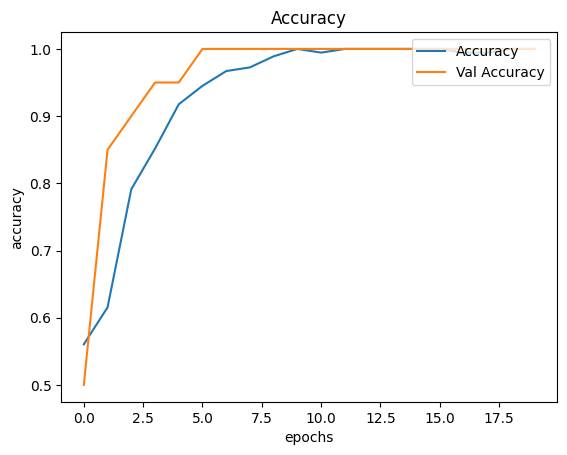

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Val Accuracy'], loc = 'upper right')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

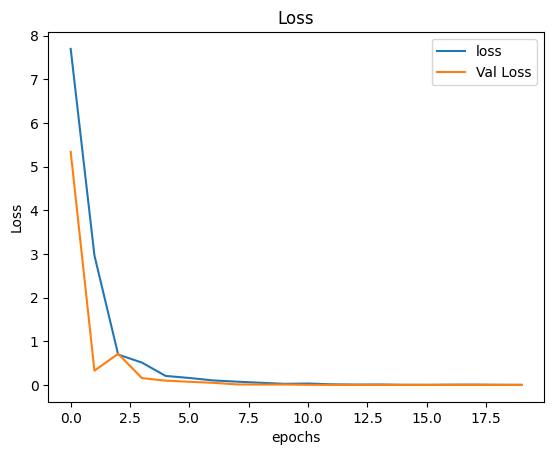

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'Val Loss'], loc = 'upper right')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

In [40]:
model.save('/content/drive/MyDrive/brain_mri.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
